In [3]:
## John Llano Section A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic.csv')

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [5]:
print("Number of passengers: " + str(titanic_df.shape[0]))
print("Percent of male passengers: " + str(titanic_df.query('Sex == 1').shape[0]/891*100))
print("Percent of survivors: " + str(titanic_df.query('Survived == 1').shape[0]/891*100))

Number of passengers: 891
Percent of male passengers: 64.75869809203144
Percent of survivors: 38.38383838383838


Your written answer:

 - 891 passengers recorded
 - 64.76% male passengers
 - 38.38% survived


### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [6]:
num_females = titanic_df.query('Sex == 0').shape[0]
num_males = titanic_df.query('Sex == 1').shape[0]
num_female_surv = titanic_df.query('Sex == 0 and Survived == 1').shape[0]
num_male_surv = titanic_df.query('Sex == 1 and Survived == 1').shape[0]
print("Percent of female survivors: " + str(num_female_surv/num_females*100))
print("Percent of female survivors: " + str(num_male_surv/num_males*100))

Percent of female survivors: 74.20382165605095
Percent of female survivors: 18.890814558058924


Your written answer:

 - 74.20% of women survived
 - 18.89% of men survived

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [7]:
group_titanic_df = titanic_df.groupby(['Pclass']).agg({'Pclass':'count', 'Survived': 'sum'})
group_titanic_df['ticket_percent'] = group_titanic_df['Pclass']/891*100
group_titanic_df['survivorship_percent'] = group_titanic_df['Survived']/group_titanic_df['Pclass']*100
group_titanic_df

,Pclass,Survived,ticket_percent,survivorship_percent
Pclass,,,,
1,216,136,24.242424,62.962963
2,184,87,20.650954,47.282609
3,491,119,55.106622,24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.24%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0
Non-Survivors:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


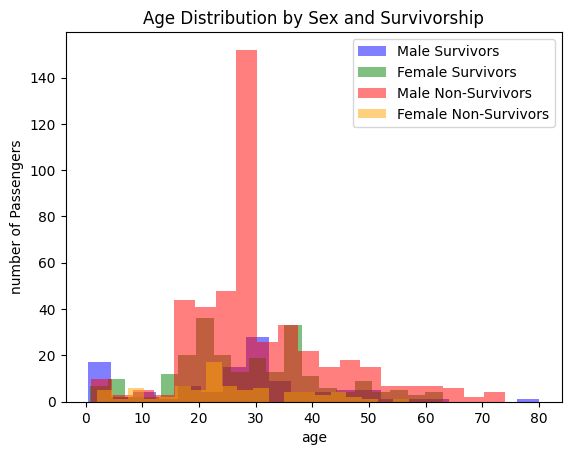

In [8]:
survivors_df = titanic_df.query('Survived == 1')[['Age', 'Name', 'Sex']]
non_survivors_df = titanic_df.query('Survived == 0')[['Age', 'Name', 'Sex']]

print("Survivors:")
print(survivors_df.head())

print("Non-Survivors:")
print(non_survivors_df.head())

plt.hist(
    survivors_df.query('Sex == 1')['Age'],
    bins=20, alpha=0.5, label='Male Survivors', color='blue', histtype='stepfilled'
)
plt.hist(
    survivors_df.query('Sex == 0')['Age'],
    bins=20, alpha=0.5, label='Female Survivors', color='green', histtype='stepfilled'
)

plt.hist(
    non_survivors_df.query('Sex == 1')['Age'],
    bins=20, alpha=0.5, label='Male Non-Survivors', color='red', histtype='stepfilled'
)
plt.hist(
    non_survivors_df.query('Sex == 0')['Age'],
    bins=20, alpha=0.5, label='Female Non-Survivors', color='orange', histtype='stepfilled'
)

plt.title('Age Distribution by Sex and Survivorship')
plt.xlabel('age')
plt.ylabel('number of Passengers')
plt.legend()

plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [9]:
def plotDecisionBoundary(model, data = None, xy_lim = None, ax = None):

    import matplotlib.pyplot as plt
    import numpy as np
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize = (5,5))
    else:
        fig = ax.get_figure()
    
    # Check if data or xy_lim is provided
    if data is None and xy_lim is None:
        raise ValueError('If data is None, xy_lim must be provided')
    elif xy_lim is not None:
        f0_min, f0_max, f1_min, f1_max = xy_lim[0][0], xy_lim[0][1], xy_lim[1][0], xy_lim[1][1]
    elif not data is None:
        X = data[0]
        y = data[1]
        f0_min, f0_max, f1_min, f1_max = min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])

    range0, range1 = f0_max-f0_min, f1_max-f1_min

    F0, F1 = np.meshgrid(np.linspace(f0_min-0.1*range0, f0_max+0.1*range0, 200), np.linspace(f1_min-0.1*range1, f1_max+0.1*range1, 200))
    F_grid = np.vstack([F0.ravel(), F1.ravel()]).transpose()

    labels = model.classes_
    label_nums = np.arange(len(labels))
    label_dict = dict(zip(labels, label_nums))

    y_grid = model.predict(F_grid)
    y_num_grid = np.array([label_dict[y_lab] for y_lab in y_grid]).reshape(F0.shape)

    cmap = plt.get_cmap('tab10', len(labels))
    ax.contourf(F0, F1, y_num_grid, cmap = cmap, alpha = 0.25)

    if not data is None:
        for label, label_num in zip(labels, label_nums):
            ax.scatter(X[y==label,0], X[y==label,1], label = label, s = 10, alpha = 0.75)
        ax.legend()
    plt.show()

    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_aspect('equal')
    return fig, ax

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

features = ['Age', 'Sex', 'Pclass']

label = ['Survived']

X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[label], test_size = 0.2)

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test =  y_test.values.ravel()

labels = titanic_df['Survived'].unique()

knn_clf = KNeighborsClassifier(n_neighbors = 1)

knn_clf.fit(Xs_train, ys_train)
# fig, ax = plotDecisionBoundary(knn_clf, data = (Xs_train, ys_train))


KNeighborsClassifier(n_neighbors=1)

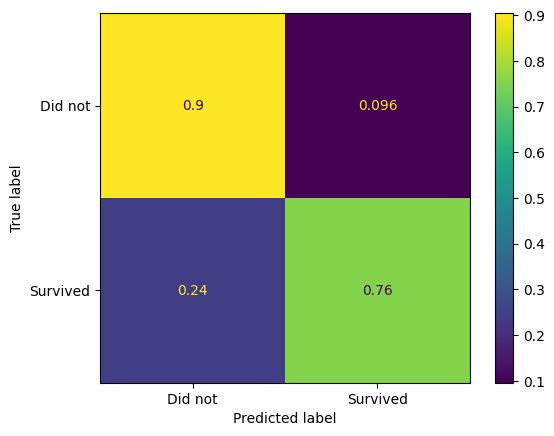

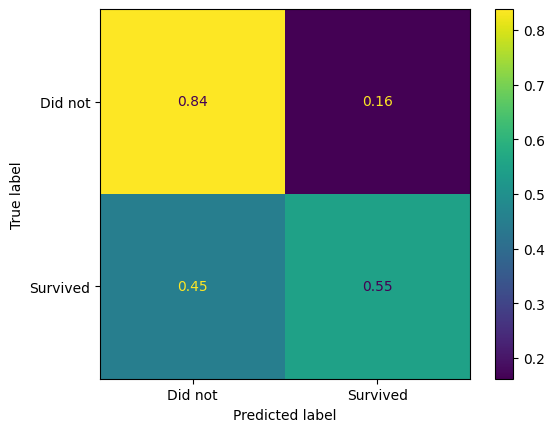

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

ConfusionMatrixDisplay.from_predictions(ys_train, y_knn_train, normalize='true', display_labels = ['Did not', 'Survived'])
ConfusionMatrixDisplay.from_predictions(ys_test, y_knn_test, normalize='true', display_labels = ['Did not', 'Survived'])

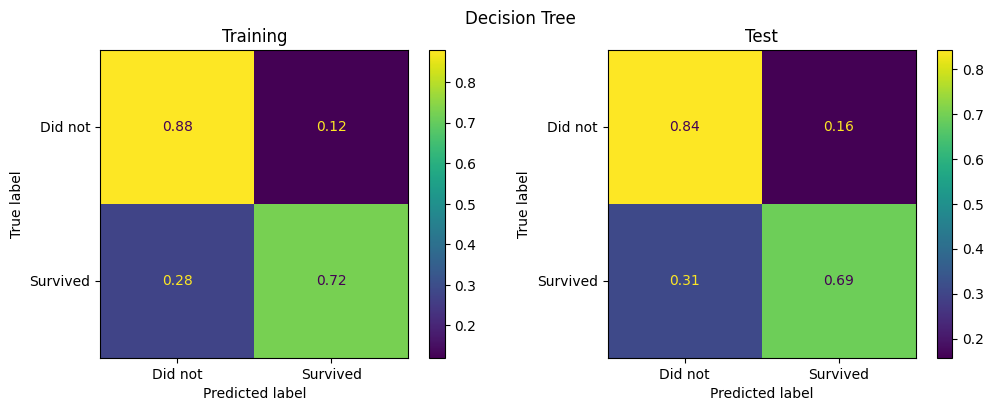

[Text(0.5089285714285714, 0.9, 'Sex <= -0.328\ngini = 0.471\nsamples = 712\nvalue = [441, 271]\nclass = Drowned'),
 Text(0.2857142857142857, 0.7, 'Pclass <= 0.239\ngini = 0.374\nsamples = 245\nvalue = [61, 184]\nclass = Survived'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'Age <= 1.012\ngini = 0.073\nsamples = 131\nvalue = [5, 126]\nclass = Survived'),
 Text(0.07142857142857142, 0.3, 'Age <= -0.161\ngini = 0.039\nsamples = 101\nvalue = [2, 99]\nclass = Survived'),
 Text(0.03571428571428571, 0.1, 'gini = 0.081\nsamples = 47\nvalue = [2, 45]\nclass = Survived'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]\nclass = Survived'),
 Text(0.21428571428571427, 0.3, 'Pclass <= -0.951\ngini = 0.18\nsamples = 30\nvalue = [3, 27]\nclass = Survived'),
 Text(0.17857142857142858, 0.1, 'gini = 0.087\nsamples = 22\nvalue = [1, 21]\nclass = Survived'),
 Text(0.25, 0.1, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = Survived'),
 Text(0.4

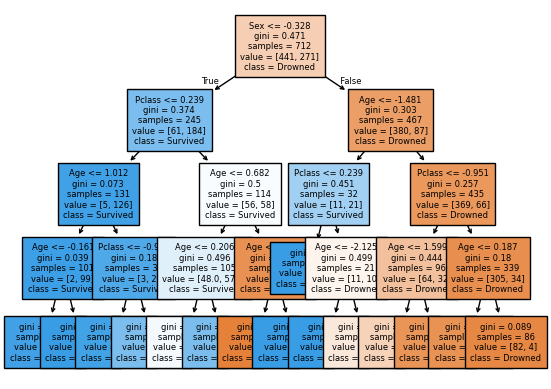

In [43]:
tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(Xs_train, ys_train)

y_tree_train = tree_clf.predict(Xs_train)
y_tree_test = tree_clf.predict(Xs_test)

fig, ax = plt.subplots(1,2, figsize = (12,4))
ConfusionMatrixDisplay.from_predictions(ys_train, y_tree_train, normalize='true', display_labels = ['Did not', 'Survived'], ax=ax[0])
ConfusionMatrixDisplay.from_predictions(ys_test, y_tree_test, normalize='true', display_labels = ['Did not', 'Survived'], ax=ax[1])

ax[0].set_title('Training')
ax[1].set_title('Test')
fig.suptitle('Decision Tree')
plt.show()

plot_tree(tree_clf, class_names = ['Drowned', 'Survived'], feature_names = features, filled=True, fontsize=6)

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - The model's performance on the training data was better than on the test data in both scenarios



Which models did you fit and which worked better?
 
 - I fit the decision tree and KNN models, and it appears that KNN performed slightly better than decision tree.
